In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing and Constructing Dataset**

In [ ]:
INPUT_PATH = '/content/drive/MyDrive/Dataset/ransomwaredataset2016-main/'

f1= open(INPUT_PATH + 'VariableNames.txt', encoding = 'utf-8')
columns=[]
for i in f1:
    column = i.split(';')
    columns.append(column[1].replace('\n', ''))



data = pd.read_csv(INPUT_PATH + 'RansomwareData.csv', header=None,names=columns)

dataset_temp =  data.loc[:, (data != data.iloc[0]).any()]

dataset = dataset_temp.drop(['ID', 'Ransomware Family'], axis =1)
dataset.head()

,Label (1 Ransomware / 0 Goodware),API:GetSystemDirectoryA,API:WriteConsoleA,API:NtOpenFile,API:NtCreateProcessEx,API:GetSystemInfo,API:WriteConsoleW,API:NtReadVirtualMemory,API:RemoveDirectoryA,API:GetKeyState,...,STR:16247,STR:16252,STR:16253,STR:16255,STR:16256,STR:16259,STR:16260,STR:16261,STR:16264,STR:16267
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# **Train-Test Split**

In [ ]:
X= dataset.drop(columns='Label (1 Ransomware / 0 Goodware)', axis =1)
Y= dataset['Label (1 Ransomware / 0 Goodware)']

print(X)
print("----------------------------------")
print(Y)

      API:GetSystemDirectoryA  API:WriteConsoleA  API:NtOpenFile  \
0                           0                  0               0   
1                           1                  0               1   
2                           0                  0               0   
3                           0                  0               0   
4                           1                  0               1   
...                       ...                ...             ...   
1519                        0                  0               0   
1520                        0                  0               1   
1521                        0                  0               1   
1522                        0                  0               1   
1523                        0                  0               1   

      API:NtCreateProcessEx  API:GetSystemInfo  API:WriteConsoleW  \
0                         0                  0                  0   
1                         0                  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)
print(X_train.shape)

(1219, 23616)


# **Feature Selection and Automation**

##  *Information Gain*

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
acc_list = []
for p in range(25, 101, 25):
  selected_top_columns = SelectPercentile(mutual_info_classif, percentile=p)
  selected_top_columns.fit(X_train, Y_train)
  features_selected = X_train.columns[selected_top_columns.get_support()]
  X_train_select = X_train[features_selected]
  X_test_select = X_test[features_selected]
  model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)
  history1 = model_DTC.fit(X_train_select, Y_train)
  y_pred = model_DTC.predict(X_test_select)
  acc_list.append(accuracy_score(y_pred, Y_test))


## *Chi Square*

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

acc_list_chi2 = []
for p in range(1, 100, 1):
  selectChi2 = SelectPercentile(chi2, percentile=25).fit(X_train, Y_train)
  chi2_selected = selectChi2.get_support()
  features_selected = X_train.columns[chi2_selected]
  X_train_select = X_train[features_selected]
  X_test_select = X_test[features_selected]
  model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)
  history1 = model_DTC.fit(X_train_select, Y_train)
  y_pred = model_DTC.predict(X_test_select)
  acc_list_chi2.append(accuracy_score(y_pred, Y_test))

## **For IG and Chi2**

Text(0, 0.5, 'Accuracy')

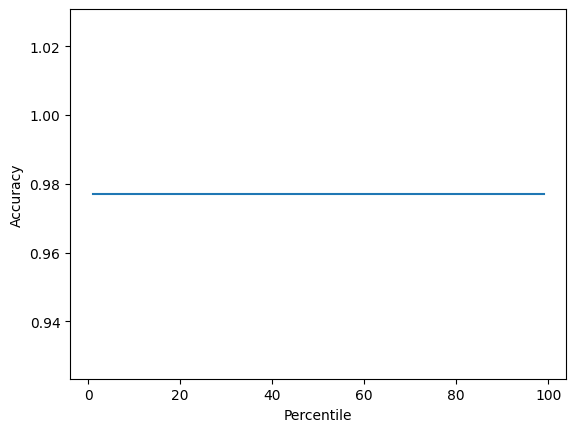

In [ ]:
plt.plot(range(1, 100, 1), acc_list_chi2, label='Percentile of Features Used vs Accuracy')
plt.xlabel('Percentile')
plt.ylabel('Accuracy')

## *Variance Threshold*

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
threshold = 0.001


selector = VarianceThreshold(threshold=threshold)
selector.fit_transform(X_train)
num_feats = selector.n_features_in_
features_selected = selector.get_feature_names_out()


X_train_select = X_train[features_selected]
X_test_select = X_test[features_selected]
print(len(X_train_select.columns))

4671


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
acc_list = []
for t in range(0, 250, 1):
  threshold = t*0.001
  selector = VarianceThreshold(threshold=threshold)
  selector.fit_transform(X_train)
  num_feats = selector.n_features_in_
  features_selected = selector.get_feature_names_out()
  X_train_select = X_train[features_selected]
  X_test_select = X_test[features_selected]
  model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)
  history1 = model_DTC.fit(X_train_select, Y_train)
  y_pred = model_DTC.predict(X_test_select)
  acc_list.append(accuracy_score(y_pred, Y_test))


Text(0, 0.5, 'Accuracy')

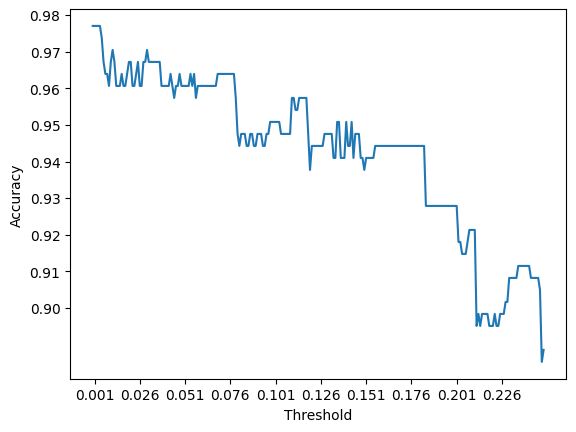

In [ ]:
thrshld_list = []
for t in range(0, 250, 1):
  thrshld_list.append(t*0.001)

plt.plot(thrshld_list, acc_list, label='Threshold vs Accuracy in Variance Threshold')
plt.xticks(np.arange(0.001, 0.249, step=0.025))
plt.yticks(np.arange(0.90, 0.99, step=0.01))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

## *Mean Absolute Difference(MAD)*

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def mean_absolute_difference(X, Y):
    abs_diff = np.abs(X - Y)
    mad = np.mean(abs_diff, axis=0)
    return mad

mad_scores = mean_absolute_difference(X_train, Y_train)
def custom_score_function(X, Y):
    return mad_scores
acc_list_mad = []

for p in range(1,100,1):
    mad_selector = SelectPercentile(score_func= custom_score_function, percentile=25)
    mad_selector.fit(X_train, Y_train)
    indices = mad_selector.get_support(indices=True)
    features_selected = X_train.columns[indices]
    X_train_select = X_train[features_selected]
    X_test_select = X_test[features_selected]
    model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)
    history1 = model_DTC.fit(X_train_select, Y_train)
    y_pred = model_DTC.predict(X_test_select)
    acc_list_mad.append(accuracy_score(y_pred, Y_test))

Text(0, 0.5, 'Accuracy')

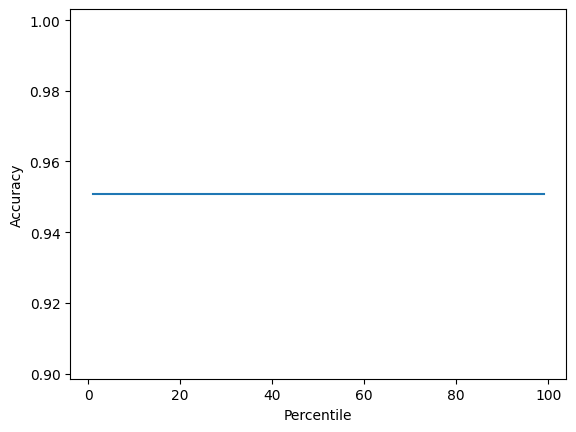

In [ ]:

plt.plot(range(1, 100, 1), acc_list_mad, label='Percentile of Features Used vs Accuracy')
plt.xlabel('Percentile')
plt.ylabel('Accuracy')


## *Maximum Relevance Minimum Redundancy(MRMR)*

In [ ]:
!pip install mrmr_selection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X_train, y=Y_train, K=4671)

 15%|█▌        | 706/4671 [1:14:12<7:07:24,  6.47s/it]

# Decision Tree Classifier(For Testing Purpose ONLY)

In [ ]:
X_train_select = X_train[features_selected]
X_test_select = X_test[features_selected]
print(len(X_train_select.columns))

7084


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)
history1 = model_DTC.fit(X_train_select, Y_train)
y_pred = model_DTC.predict(X_test_select)
print(f'Accuracy for decision tree model is : {(accuracy_score(y_pred, Y_test)*100)}')

C = confusion_matrix(Y_test,y_pred)
tn, fp, fn, tp = C.ravel()
print()
print(f'False Positive Calculted : {(fp / (fp + tn))*100}')
print(f'False Negative Calculted : {(fn / (fn + tp))*100}')

Step 10: Training Accuracy = 0.8482, Validation Accuracy = 0.8525
Step 20: Training Accuracy = 0.8482, Validation Accuracy = 0.8525
Step 30: Training Accuracy = 0.7744, Validation Accuracy = 0.7836
Step 40: Training Accuracy = 0.7818, Validation Accuracy = 0.8066
Step 50: Training Accuracy = 0.9098, Validation Accuracy = 0.9016
Step 60: Training Accuracy = 0.8958, Validation Accuracy = 0.8951
Step 70: Training Accuracy = 0.8499, Validation Accuracy = 0.8590
Step 80: Training Accuracy = 0.8983, Validation Accuracy = 0.8689
Step 90: Training Accuracy = 0.8860, Validation Accuracy = 0.8689
Step 100: Training Accuracy = 0.8950, Validation Accuracy = 0.8721


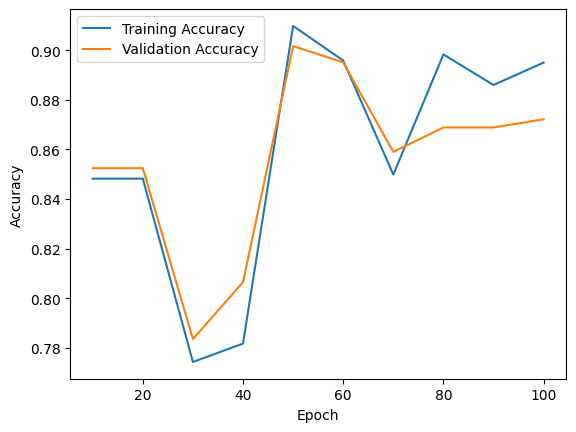

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

training_accuracy = []
validation_accuracy = []

for step in range(10, 101, 10):

    model_DTC.fit(X_train_select[:step], Y_train[:step])

    train_predictions = model_DTC.predict(X_train_select)

    val_predictions = model_DTC.predict(X_test_select)

    train_accuracy = accuracy_score(Y_train, train_predictions)
    val_accuracy = accuracy_score(Y_test, val_predictions)


    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

plt.plot(range(10, 101, 10), training_accuracy, label='Training Accuracy')
plt.plot(range(10, 101, 10), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
